In [1]:
#import

import cv2

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
sns.set()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
path = os.getcwd()
path

'/home/user/AI_HandSign_Number'

In [4]:
# loading dataset

X = np.load(path + "/dataset/X.npy")
Y = np.load(path + "/dataset/Y.npy")

print("Samples shape", X.shape)
print("Labels shape", Y.shape)

Samples shape (2062, 64, 64)
Labels shape (2062, 10)


In [5]:
# X is already normalize/preprocessed (i.e )

In [6]:
X[1].shape

(64, 64)

In [7]:
#overwiev datasets, labels

Y_df = pd.DataFrame(Y)

label=[]
for i in range(0,X.shape[0]):
    if Y_df.loc[i,0] == 1:
        label.append(9)
    elif Y_df.loc[i,1] == 1:
        label.append(0)
    elif Y_df.loc[i,2] == 1:
        label.append(7)
    elif Y_df.loc[i,3] == 1:
        label.append(6)
    elif Y_df.loc[i,4] == 1:
        label.append(1)
    elif Y_df.loc[i,5] == 1:
        label.append(8)
    elif Y_df.loc[i,6] == 1:
        label.append(4)
    elif Y_df.loc[i,7] == 1:
        label.append(3)
    elif Y_df.loc[i,8] == 1:
        label.append(2)
    elif Y_df.loc[i,9] == 1:
        label.append(5)
        
Y_labels = pd.Series(label)

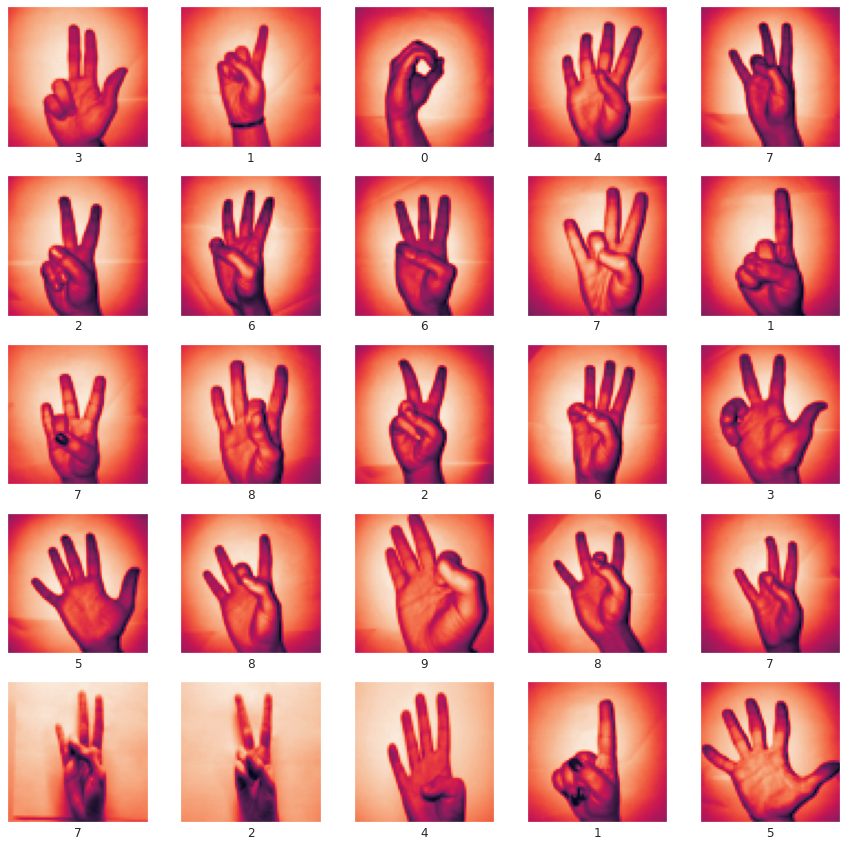

In [8]:
# Plot random samples and corresponding class

plt.figure(figsize=(15,15))
for ii in range(0, 25):
    plt.subplot(5,5,ii+1)
    plt.xticks([])
    plt.yticks([])
    randno = random.randint(0, X.shape[0])
    plt.imshow(X[randno])
    plt.xlabel(Y_labels[randno])

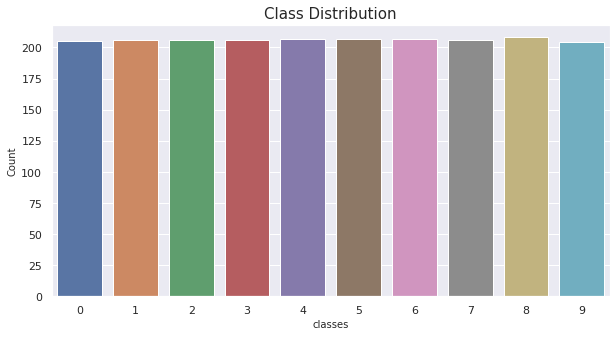

In [9]:
# Check data distribution

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

b = sns.countplot(x = Y_labels)
b.axes.set_title('Class Distribution', fontsize = 15)
b.set_xlabel('classes', fontsize = 10)
b.set_ylabel('Count', fontsize = 10)
#print(Y_labels.value_counts())
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=100)

X_train = X_train.reshape(-1,64,64,1)
X_test  = X_test.reshape(-1,64,64,1)

print("x_train", X_train.shape)
print("x_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (1649, 64, 64, 1)
x_test (413, 64, 64, 1)
y_train (1649, 10)
y_test (413, 10)


In [11]:
# GRADED FUNCTION: convolutional_model
from tensorflow.keras.models import Sequential

def convolutional_model():
    
    input_img = (X_train.shape[1], X_train.shape[2], 1)
    output    = 10
    
    model = Sequential()

    # Convolutional layer 1

    model.add(Conv2D(filters=8, kernel_size=(5,5), padding ="same", activation= "relu", input_shape=input_img))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 2

    model.add(Conv2D(filters=64, kernel_size=(3,3), padding ="same", activation= "relu"))
    model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 3

    model.add(Conv2D(filters=16, kernel_size=(3,3), padding ="same", activation= "relu"))
    model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
    model.add(Dropout(0.25))

    # Convolutional Layer 4

    model.add(Conv2D(filters=16, kernel_size=(3,3), padding ="same", activation= "relu"))
    model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
    model.add(Dropout(0.25))

    # Fully Connected Layers

    model.add(Flatten())
    model.add(Dense(256, activation= "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation= "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(output, activation= "softmax"))
    
    return model

In [12]:
model = convolutional_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4672      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        9

2021-12-11 19:21:09.310561: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-11 19:21:09.311883: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
#optimizer
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [14]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Data Augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=10,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.2, # Randomly zoom image 20%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [16]:
#Epoch and Batchsize

epochs = 100
batch_size = 32

In [17]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test), 
                    steps_per_epoch = X_train.shape[0] // batch_size)

2021-12-11 19:21:17.863278: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
51/51 [==============================] - 6s 100ms/step - loss: 2.3088 - accuracy: 0.0959 - val_loss: 2.3027 - val_accuracy: 0.0896
Epoch 2/100
51/51 [==============================] - 5s 99ms/step - loss: 2.3037 - accuracy: 0.0872 - val_loss: 2.3035 - val_accuracy: 0.0920
Epoch 3/100
51/51 [==============================] - 5s 100ms/step - loss: 2.3030 - accuracy: 0.0891 - val_loss: 2.3052 - val_accuracy: 0.0872
Epoch 4/100
51/51 [==============================] - 5s 92ms/step - loss: 2.3027 - accuracy: 0.1070 - val_loss: 2.3055 - val_accuracy: 0.0872
Epoch 5/100
51/51 [==============================] - 5s 102ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3054 - val_accuracy: 0.0823
Epoch 6/100
51/51 [==============================] - 5s 97ms/step - loss: 2.3032 - accuracy: 0.1039 - val_loss: 2.3058 - val_accuracy: 0.1017
Epoch 7/100
51/51 [==============================] - 5s 104ms/step - loss: 2.3030 - accuracy: 0.1051 - val_loss: 2.3054 - val_accuracy: 0.0872
Ep

Epoch 58/100
51/51 [==============================] - 7s 129ms/step - loss: 0.4134 - accuracy: 0.8627 - val_loss: 0.1409 - val_accuracy: 0.9685
Epoch 59/100
51/51 [==============================] - 6s 124ms/step - loss: 0.4437 - accuracy: 0.8510 - val_loss: 0.1551 - val_accuracy: 0.9685
Epoch 60/100
51/51 [==============================] - 6s 117ms/step - loss: 0.4140 - accuracy: 0.8677 - val_loss: 0.1699 - val_accuracy: 0.9613
Epoch 61/100
51/51 [==============================] - 5s 101ms/step - loss: 0.4383 - accuracy: 0.8695 - val_loss: 0.1530 - val_accuracy: 0.9685
Epoch 62/100
51/51 [==============================] - 5s 105ms/step - loss: 0.3710 - accuracy: 0.8819 - val_loss: 0.1525 - val_accuracy: 0.9613
Epoch 63/100
51/51 [==============================] - 7s 132ms/step - loss: 0.4052 - accuracy: 0.8726 - val_loss: 0.1666 - val_accuracy: 0.9588
Epoch 64/100
51/51 [==============================] - 7s 131ms/step - loss: 0.3861 - accuracy: 0.8738 - val_loss: 0.1475 - val_accuracy:

In [28]:
Val_acc=history.history['val_accuracy'][-1]
acc=history.history['accuracy'][-1]
loss= history.history['loss'][-1]
val_loss=history.history['val_loss'][-1]

In [29]:
#Results
print('Train accuracy of the model: ',acc)
print('Train loss of the model: ',loss)
print('Validation accuracy of the model: ',Val_acc)
print('Validation loss of the model: ',val_loss)

Train accuracy of the model:  0.8831250071525574
Train loss of the model:  0.3733873665332794
Validation accuracy of the model:  0.9685230255126953
Validation loss of the model:  0.16021251678466797
